In [1]:
import pandas as pd

# Load the dataset
file_path = 'TMDB_movie_dataset_v11.csv' 
movies = pd.read_csv(file_path)
print("Original shape of the dataset:", movies.shape)

#Handle duplicate rows
if movies.duplicated().sum() > 0:
    print(f"\nFound {movies.duplicated().sum()} duplicate rows. Removing them.")
    movies = movies.drop_duplicates()

#Select only columns needed for this task 
columns = ["title", "popularity", "vote_average", "runtime", "genres", "original_language", "vote_count", "status"]
movies_subset = movies[columns]

#Drop rows where 'title' is missing
if movies_subset['title'].isnull().sum() > 0:
    print(f"\nFound {movies_subset['title'].isnull().sum()} missing values in 'title'. Removing these rows.")
    movies_subset = movies_subset.dropna(subset=['title'])


Original shape of the dataset: (1137709, 24)

Found 368 duplicate rows. Removing them.

Found 13 missing values in 'title'. Removing these rows.


In [2]:
# Check for missing values and their percentages
missing_summary = movies_subset.isnull().sum().to_frame(name='Missing Count')
missing_summary['Missing Percentage'] = (missing_summary['Missing Count'] / len(movies_subset)) * 100
print(missing_summary)


                   Missing Count  Missing Percentage
title                          0            0.000000
popularity                     0            0.000000
vote_average                   0            0.000000
runtime                        0            0.000000
genres                    455893           40.084567
original_language              0            0.000000
vote_count                     0            0.000000
status                         0            0.000000


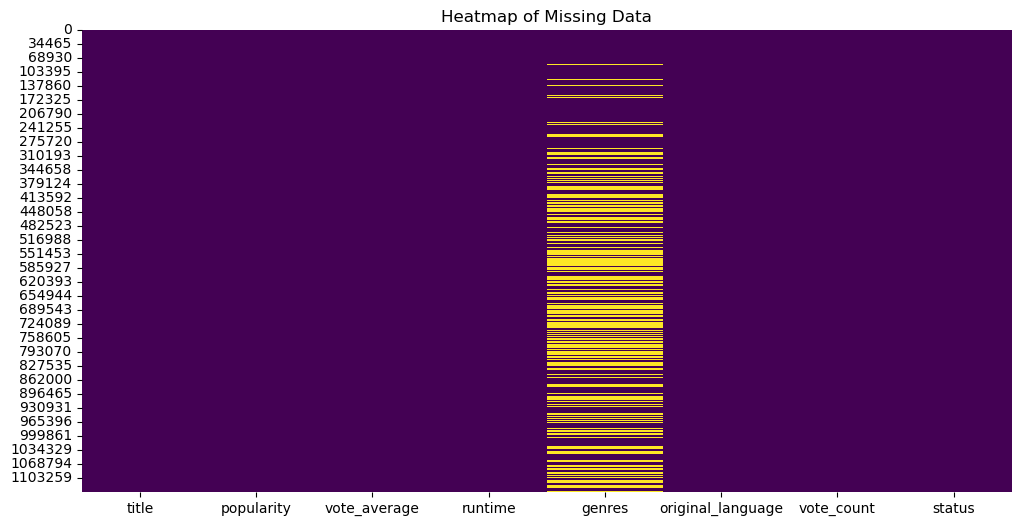

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data with a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(movies_subset.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()


In [4]:
# Fill missing 'genres' with 'Unknown'
movies_subset['genres'] = movies_subset['genres'].fillna('Unknown')

print("Filled missing 'genres' with 'Unknown'.")


Filled missing 'genres' with 'Unknown'.


In [5]:
# Filter the rows where status is "Released"
movies_cleaned = movies_subset.loc[movies_subset['status'] == 'Released']

# Check the new shape of the cleaned dataset
print(movies_cleaned.shape)

(1111310, 8)


In [6]:
# Split the 'genres' column by commas and flatten the list
all_genres = movies_cleaned['genres'].str.split(',').explode().str.strip()

# Get unique genres
unique_genres = all_genres.unique()

# Count the number of unique genre categories
unique_genres_count = len(unique_genres)

# Remove extra whitespaces from the 'genres' column
movies_cleaned['genres'] = movies_cleaned['genres'].str.replace(r'\s+', '', regex=True)

# Create one-hot encoding for each genre
genre_dummies = movies_cleaned['genres'].str.get_dummies(sep=',')

# Merge these dummy columns with the original dataset
movies_cleaned = pd.concat([movies_cleaned, genre_dummies], axis=1)

# Display the unique genre categories and the total count
print(f"Unique genres: {unique_genres}")
print(f"Total number of unique genres: {unique_genres_count}")

print(movies_cleaned.shape)





C:\Users\sabit\AppData\Local\Temp\ipykernel_23100\3603947989.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned['genres'] = movies_cleaned['genres'].str.replace(r'\s+', '', regex=True)


Unique genres: ['Action' 'Science Fiction' 'Adventure' 'Drama' 'Crime' 'Thriller'
 'Fantasy' 'Comedy' 'Romance' 'Western' 'Mystery' 'War' 'Animation'
 'Family' 'Horror' 'Music' 'History' 'TV Movie' 'Documentary' 'Unknown']
Total number of unique genres: 20
(1111310, 28)


In [7]:
import numpy as np

count    1.111310e+06
mean     1.241270e+00
std      7.668099e+00
min      0.000000e+00
25%      6.000000e-01
50%      6.000000e-01
75%      8.720000e-01
max      2.994357e+03
Name: popularity, dtype: float64
Skewness: 171.86505247494597
Variance: 58.79974475346777


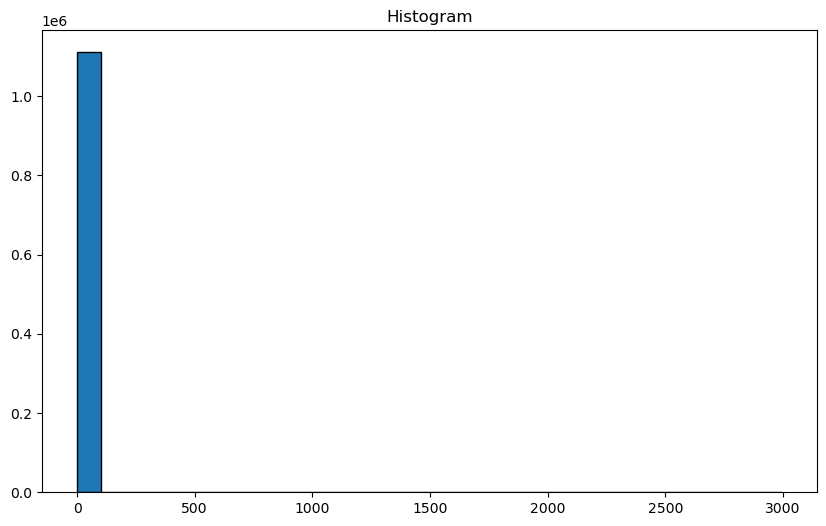

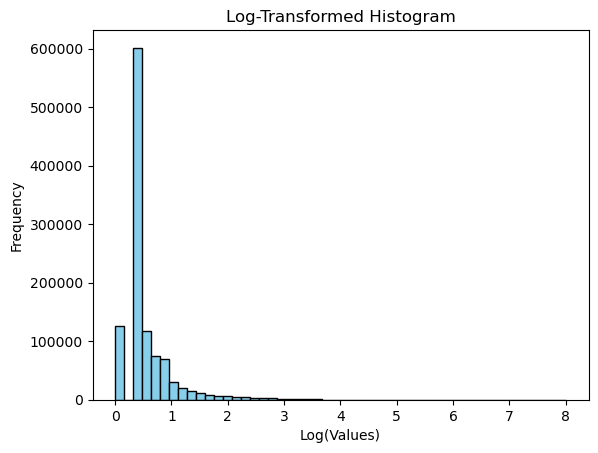

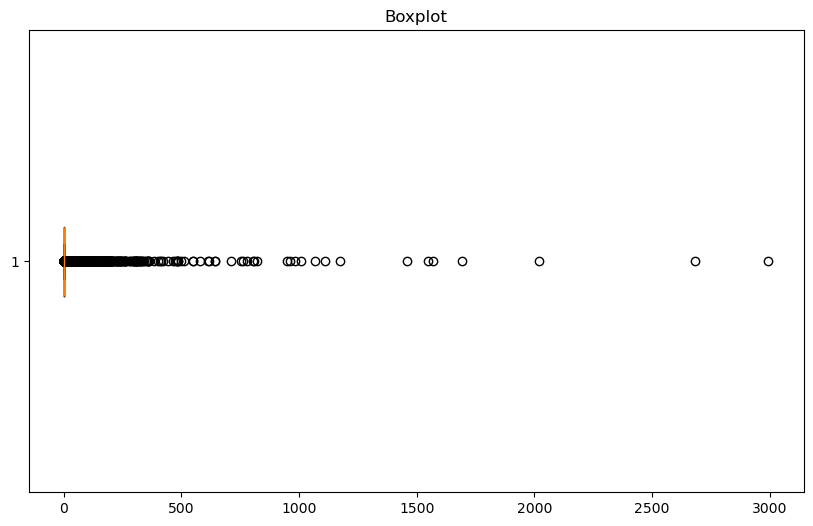

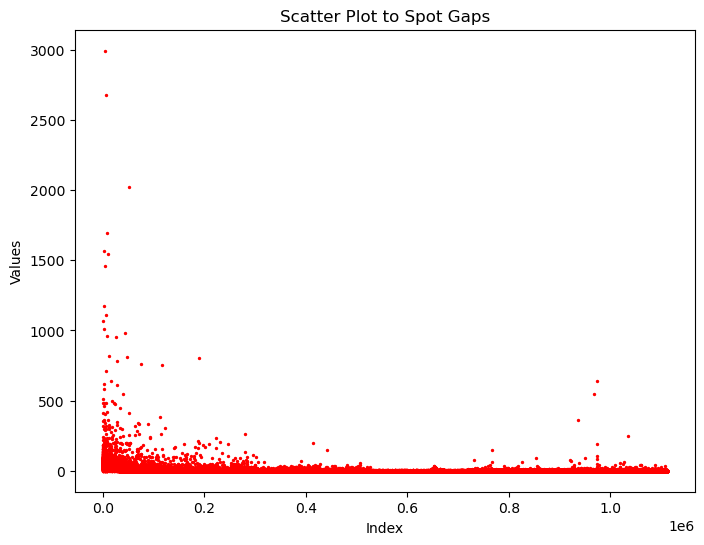

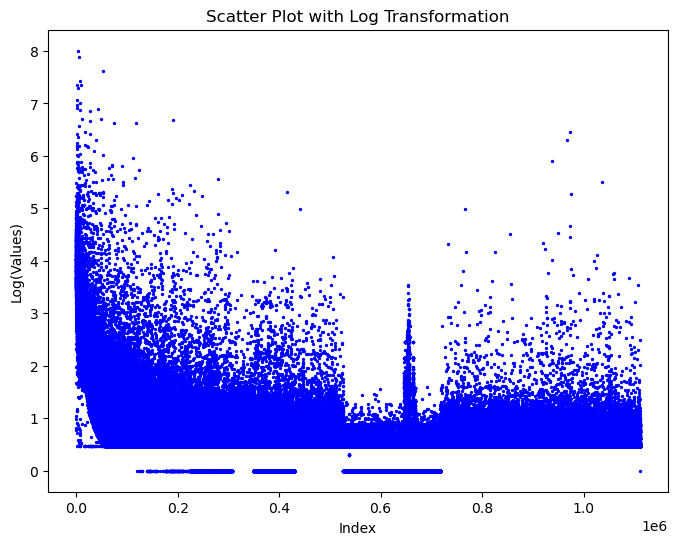

In [8]:
def eda_report(column):
    # Summary Stats
    print(column.describe())
    
    # Skewness
    print(f'Skewness: {column.skew()}')
    
    # Variance
    print(f'Variance: {column.var()}')
    
    # Plot Histogram
    plt.figure(figsize=(10, 6))
    plt.hist(column, bins=30, edgecolor='black')
    plt.title('Histogram')
    plt.show()

    # Log transform the data (add 1 to avoid log(0))
    log_data = np.log1p(column)
    
    # Plot the histogram of log-transformed data
    plt.hist(log_data, bins=50, color='skyblue', edgecolor='black')
    plt.title('Log-Transformed Histogram')
    plt.xlabel('Log(Values)')
    plt.ylabel('Frequency')
    plt.show()

    
    # Boxplot
    plt.figure(figsize=(10, 6))
    plt.boxplot(column, vert=False)
    plt.title('Boxplot')
    plt.show()

    # Scatter Plot
    index = np.arange(len(column))
    plt.figure(figsize=(8, 6))
    plt.scatter(index, column, color='red', s=2)
    plt.title('Scatter Plot to Spot Gaps')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.show()    

    # Log transform the values (add 1 to avoid log(0))
    log_values = np.log1p(column)
    
    # Scatter plot after log transformation
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(log_values)), log_values, color='blue', s=2)
    plt.title('Scatter Plot with Log Transformation')
    plt.xlabel('Index')
    plt.ylabel('Log(Values)')
    plt.show()
    

# Run EDA 
eda_report(movies_cleaned['popularity'])


In [9]:
# Sort the dataset by 'popularity' in descending order
sorted_popularity = movies_cleaned.sort_values(by='vote_count', ascending=False)

# Display the top 10 rows with the highest popularity
print(sorted_popularity.head(2000))


                                       title  popularity  vote_average  \
0                                  Inception      83.952         8.364   
1                               Interstellar     140.241         8.417   
2                            The Dark Knight     130.643         8.512   
3                                     Avatar      79.932         7.573   
4                               The Avengers      98.082         7.710   
...                                      ...         ...           ...   
1995                                  John Q      24.720         7.111   
1996                           The Cable Guy      16.715         5.964   
1997                                 Flubber      18.803         5.631   
1998  Resident Evil: Welcome to Raccoon City      58.776         6.029   
1999                                Mulan II      31.610         6.477   

      runtime                                   genres original_language  \
0         148          Action,Scien

In [10]:
# Remove outliers using IQR
Q1 = movies_cleaned['popularity'].quantile(0.25)
Q3 = movies_cleaned['popularity'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)
print(movies_cleaned.shape)

# Filter data to remove outliers
movies_cleaned = movies_cleaned[(movies_cleaned['popularity'] >= lower_bound) & 
                                         (movies_cleaned['popularity'] <= upper_bound)]
print(movies_cleaned.shape)
movies_cleaned.describe()



0.19199999999999995
1.28
(1111310, 28)
(802443, 28)


,popularity,vote_average,runtime,vote_count,Action,Adventure,Animation,Comedy,Crime,Documentary,...,Horror,Music,Mystery,Romance,ScienceFiction,TVMovie,Thriller,Unknown,War,Western
count,802443.000000,802443.000000,802443.000000,802443.000000,802443.000000,802443.000000,802443.000000,802443.000000,802443.000000,802443.000000,...,802443.000000,802443.000000,802443.000000,802443.000000,802443.000000,802443.000000,802443.000000,802443.000000,802443.000000,802443.000000
mean,0.669960,1.566835,42.701001,0.702839,0.025156,0.014068,0.054274,0.104554,0.020593,0.170712,...,0.038034,0.047698,0.012464,0.033332,0.013778,0.014379,0.024678,0.415180,0.007719,0.006405
std,0.153664,2.904483,60.662957,20.237727,0.156598,0.117773,0.226558,0.305979,0.142019,0.376258,...,0.191278,0.213127,0.110946,0.179502,0.116568,0.119046,0.155143,0.492753,0.087518,0.079777
min,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.617000,1.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.280000,10.000000,14400.000000,10530.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
print(f"Number of movies with runtime 0: {sum(movies_cleaned['runtime'] == 0)}")

# Filter out movies with runtime equal to 0
movies_cleaned = movies_cleaned[movies_cleaned['runtime'] != 0]

# Verify that movies with runtime 0 have been removed
print(movies_cleaned.shape)


Number of movies with runtime 0: 220962
(581481, 28)


In [12]:
# Check unique values in the 'original_language' column
unique_languages = movies_cleaned['original_language'].unique()
print(f"Unique Languages: {unique_languages}")

# Count the number of unique languages
num_languages = movies_cleaned['original_language'].nunique()
print(f"Number of Unique Languages: {num_languages}")

# Get the frequency of each language
language_counts = movies_cleaned['original_language'].value_counts()
print(language_counts)


Unique Languages: ['en' 'ja' 'fr' 'pt' 'it' 'ru' 'ar' 'es' 'de' 'sv' 'te' 'hi' 'tr' 'xx'
 'th' 'fa' 'nl' 'uk' 'hu' 'is' 'el' 'pl' 'wo' 'fi' 'no' 'ro' 'hy' 'da'
 'cs' 'zh' 'am' 'bs' 'ca' 'lt' 'ka' 'he' 'bn' 'as' 'et' 'sh' 'sr' 'ml'
 'cn' 'tl' 'yi' 'ay' 'ku' 'eu' 'ps' 'rw' 'ko' 'gl' 'sl' 'mk' 'kk' 'km'
 'bg' 'kn' 'vi' 'ky' 'id' 'sk' 'ta' 'ik' 'az' 'ab' 'nb' 'jv' 'mr' 'bo'
 'bm' 'sq' 'li' 'sn' 'hr' 'ur' 'mo' 'af' 'ne' 'xh' 'ks' 'lv' 'kl' 'lb'
 'iu' 'la' 'ff' 'ga' 'si' 'pa' 'tg' 'ms' 'fo' 'ak' 'ha' 'sa' 'sm' 'lo'
 'rm' 'sw' 'tk' 'fy' 'mt' 'se' 'mn' 'cy' 'qu' 'ln' 'dz' 'my' 'or' 'ny'
 'eo' 'gd' 'so' 'bi' 'be' 'om' 'zu' 'ht' 'uz' 'gu' 'mi' 'cr' 'mh' 'co'
 'gn' 'mg' 'nn' 'tw' 'st' 'nv' 'ig' 'tt' 'yo' 'ug' 'kw' 'dv' 'sg' 'nd'
 'sc' 'sd' 'ie' 'fj' 'lg' 'to' 'ti' 'br' 'oj' 'su' 'cv' 'kv' 'kj' 'za'
 'kg' 'tn' 'ia' 'ba' 'aa' 'ty' 'ch' 'oc' 'hz' 'gv' 'ii' 'ts' 'ki' 'ss'
 'ce' 'rn']
Number of Unique Languages: 170
original_language
en    353666
ja     27269
fr     26772
es     26039
de     17743
   

In [13]:
# Get the top 20 most frequent languages
top_20_languages = movies_cleaned['original_language'].value_counts().head(20).index

# Filter the dataset to keep only rows with top 20 languages
movies_top_20_languages = movies_cleaned[movies_cleaned['original_language'].isin(top_20_languages)]

# Display the result
print(movies_top_20_languages['original_language'].value_counts())
print(movies_top_20_languages.shape)


original_language
en    353666
ja     27269
fr     26772
es     26039
de     17743
pt     12318
ru     12278
zh     10260
it      7834
sv      5203
ko      5140
ar      4504
xx      4237
nl      3666
pl      3446
tl      3350
hi      3120
cs      3061
fa      2863
id      2651
Name: count, dtype: int64
(535420, 28)


In [14]:
# Calculate the percentage of zero values for the 'vote_average' column
zero_values_percentage = (movies_top_20_languages['vote_average'] == 0).mean() * 100

# Display the result
print(f"Percentage of zero values in 'vote_average': {zero_values_percentage:.2f}%")


Percentage of zero values in 'vote_average': 71.75%


In [15]:
final_movies_ = movies_top_20_languages.drop(columns=['status'])

In [36]:
# Step 1: Calculate the 80th percentile for non-zero values in 'vote_count'
percentile_80 = final_movies_['vote_count'][final_movies_['vote_count'] > 0].quantile(0.80)

# Step 2: Filter rows with non-zero values and values above the 25th percentile
final_movies_filtered = final_movies_[
    (final_movies_['vote_count'] > 0) & (final_movies_['vote_count'] > percentile_80)
]

# Display the filtered DataFrame
print(f"80th Percentile: {percentile_80}")
print(final_movies_filtered['vote_count'])

80th Percentile: 4.0
248       10530
311        9417
340        8988
865        4861
1090       3926
          ...  
125839        5
125840        5
125842        5
125843        5
125847        5
Name: vote_count, Length: 23100, dtype: int64


In [17]:
# Save the cleaned dataset to a new CSV file
output_file_path = 'final_movies_.csv'
final_movies_filtered.to_csv(output_file_path, index=False)
